# Class definiton for piglet solver 

In this notebook, the piglet solver class was developed and tested by Billie. 

All useful elements from this notebook have been extracted and moved into the notebook_writeup folder where needed. This notebook only serves as a record of some of the steps we took, and hence is probably not of much interest. 

In [1]:
import copy

class PigletSolver:
    def __init__(self, goal, epsilon):
        self.goal = goal
        self.epsilon = epsilon
        self.p = [[[0.0 for _ in range(goal)] for _ in range(goal)] for _ in range(goal)]
        self.flip = [[[False for _ in range(goal)] for _ in range(goal)] for _ in range(goal)]
        self.iteration_logs = [] 
        self.value_iterate()

    def value_iterate(self):
        max_change = float('inf')
        while max_change >= self.epsilon:
            max_change = 0.0
            p_old = copy.deepcopy(self.p)  # Save current state for comparison or logging
            self.iteration_logs.append(copy.deepcopy(self.p))
            for i in range(self.goal):
                for j in range(self.goal):
                    for k in range(self.goal - i):
                        old_prob = self.p[i][j][k]
                        p_flip = (1.0 - self.p_win(j, i, 0) + self.p_win(i, j, k + 1)) / 2
                        p_hold = 1.0 - self.p_win(j, i + k, 0)
                        self.p[i][j][k] = max(p_flip, p_hold)
                        self.flip[i][j][k] = p_flip > p_hold
                        change = abs(self.p[i][j][k] - old_prob)
                        max_change = max(max_change, change)

    def p_win(self, i, j, k):
        if i + k >= self.goal:
            return 1.0
        elif j >= self.goal:
            return 0.0
        else:
            return self.p[i][j][k]

    def output_hold_values(self):
        for i in range(self.goal):
            row = []
            for j in range(self.goal):
                k = 0
                while k < self.goal - i and self.flip[i][j][k]:
                    k += 1
                row.append(str(k))
            print(' '.join(row))
            
    def print_state(self):
        print("Current state probabilities (p[i][j][k]):")
        for i in range(self.goal):
            for j in range(self.goal):
                for k in range(self.goal - i):
                    print(f"p[{i}][{j}][{k}] = {self.p[i][j][k]:.4f}")
        print("-" * 40)


Final win probability from start: 0.5714281673693462


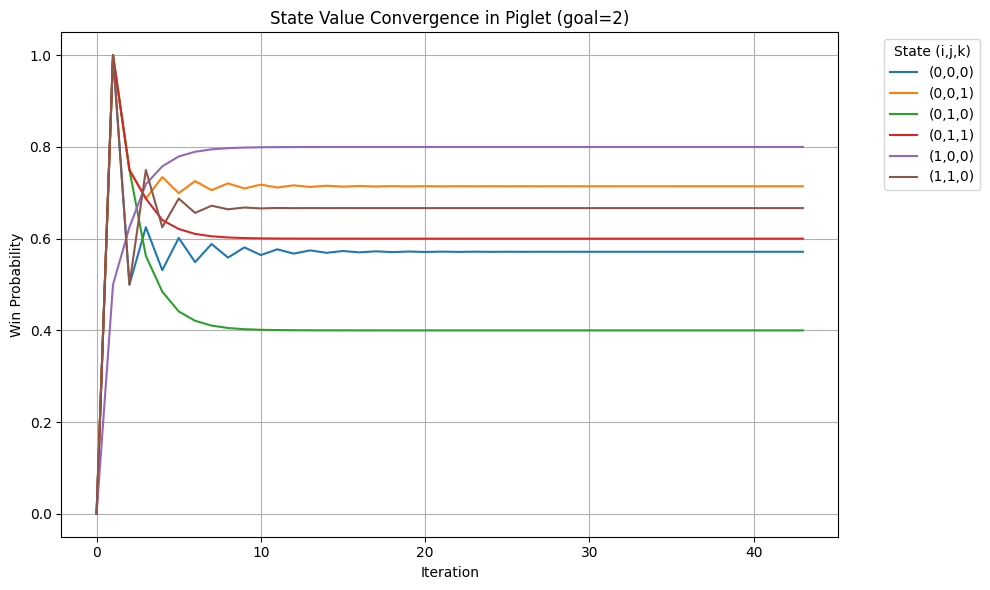

In [2]:
solver = PigletSolver(goal=2, epsilon=1e-6)
print("Final win probability from start:", solver.p[0][0][0])


import matplotlib.pyplot as plt
goal = 2
valid_states = [(i, j, k) for i in range(goal)
                          for j in range(goal)
                          for k in range(goal - i)]

# Create a plot for each state
plt.figure(figsize=(10, 6))

for state in valid_states:
    i, j, k = state
    values = [log[i][j][k] for log in solver.iteration_logs]
    plt.plot(values, label=f"({i},{j},{k})")

plt.xlabel("Iteration")
plt.ylabel("Win Probability")
plt.title("State Value Convergence in Piglet (goal=2)")
plt.legend(title="State (i,j,k)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
